In [23]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd  
import seaborn as sns
%matplotlib inline
import warnings
warnings.simplefilter("ignore")
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.tree import plot_tree

In [4]:
#Dataset from Sklearn
from sklearn.datasets import load_iris

In [ ]:
# The dataset is stored in the 'data' attribute
X = iris.data
# The target labels are stored in the 'target' attribute
y = iris.target

In [10]:
iris = load_iris()
print(iris)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [12]:
# Create a DataFrame
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target

In [29]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 146 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  146 non-null    float64
 1   sepal width (cm)   146 non-null    float64
 2   petal length (cm)  146 non-null    float64
 3   petal width (cm)   146 non-null    float64
 4   target             146 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 6.3 KB


In [31]:
iris_df.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal length (cm),146.0,5.856849,0.834093,4.3,5.1,5.8,6.4,7.9
sepal width (cm),146.0,3.040411,0.397853,2.2,2.8,3.0,3.3,4.0
petal length (cm),146.0,3.806849,1.758042,1.0,1.6,4.4,5.1,6.9
petal width (cm),146.0,1.220548,0.759393,0.1,0.3,1.3,1.8,2.5
target,146.0,1.020548,0.817643,0.0,0.0,1.0,2.0,2.0


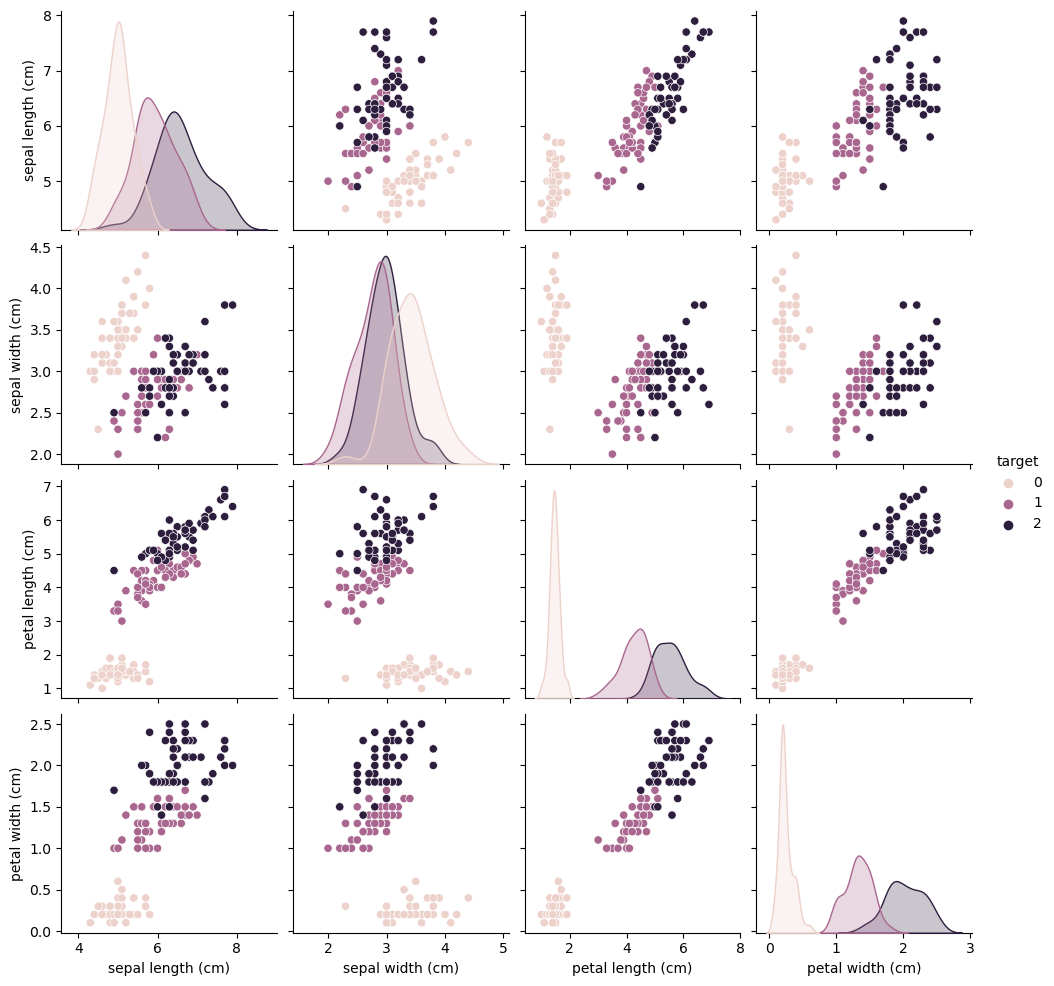

In [13]:
sns.pairplot(iris_df, hue='target')
plt.show()

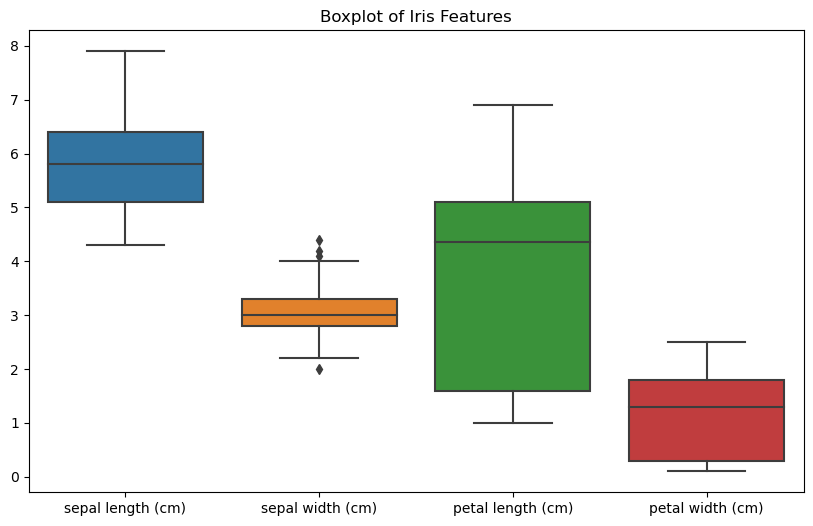

In [14]:
# Boxplot to check for outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=iris_df.iloc[:, :-1])
plt.title("Boxplot of Iris Features")
plt.show()

In [15]:
# Identify and remove outliers (you can adjust the threshold as needed)
Q1 = iris_df.iloc[:, :-1].quantile(0.25)
Q3 = iris_df.iloc[:, :-1].quantile(0.75)
IQR = Q3 - Q1
outliers = ((iris_df.iloc[:, :-1] < (Q1 - 1.5 * IQR)) | (iris_df.iloc[:, :-1] > (Q3 + 1.5 * IQR))).any(axis=1)
iris_df = iris_df[~outliers]

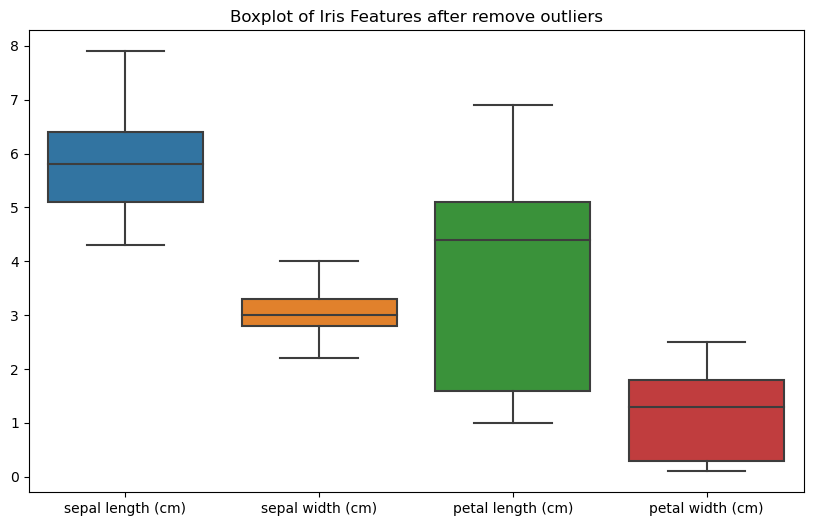

In [17]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=iris_df.iloc[:, :-1])
plt.title("Boxplot of Iris Features after remove outliers")
plt.show()

In [19]:
# Split the data into training and testing sets
X = iris_df.iloc[:, :-1]
y = iris_df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
# Decision Tree Classifier
clf = DecisionTreeClassifier(max_depth=3, criterion='entropy')
clf.fit(X_train, y_train)
y_pred_clf = clf.predict(X_test)

In [21]:
# Decision Tree Regression
reg = DecisionTreeRegressor(max_depth=3, criterion='mse')
reg.fit(X_train, y_train)
y_pred_reg = reg.predict(X_test)

In [24]:
# Evaluation
clf_accuracy = accuracy_score(y_test, y_pred_clf)
reg_mse = mean_squared_error(y_test, y_pred_reg)

print(f"Decision Tree Classifier Accuracy: {clf_accuracy}")
print(f"Decision Tree Regression MSE: {reg_mse}")

Decision Tree Classifier Accuracy: 0.9333333333333333
Decision Tree Regression MSE: 0.06519928613920285


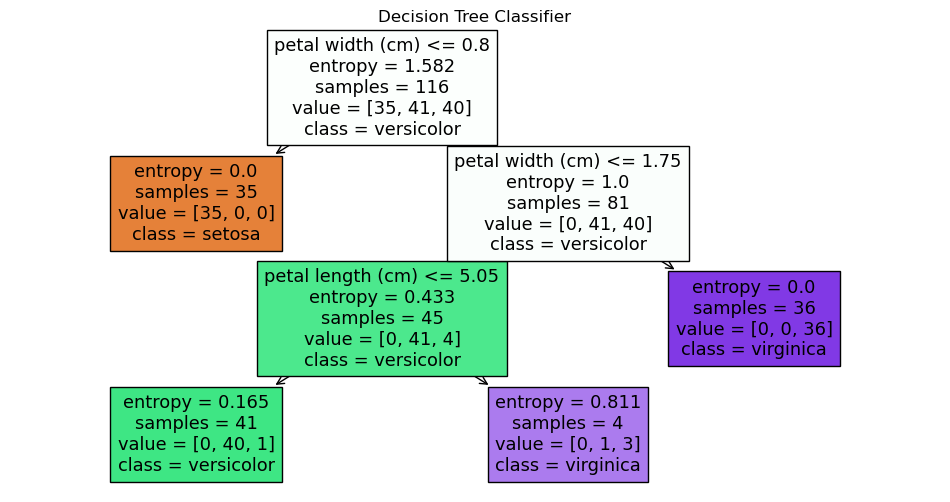

In [25]:
# Visualization of Decision Trees Classifier
plt.figure(figsize=(12, 6))
plot_tree(clf, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
plt.title("Decision Tree Classifier")
plt.show()

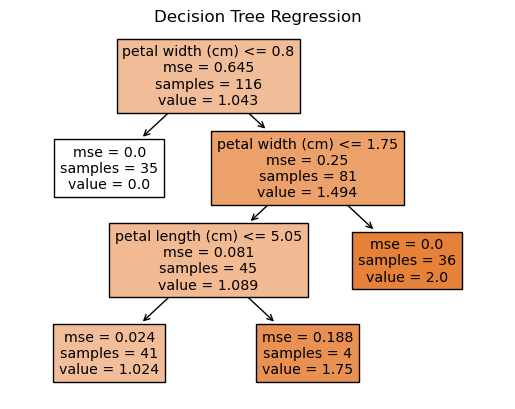

In [27]:
# Visualization of Decision Trees Regression
plot_tree(reg, feature_names=iris.feature_names, filled=True)
plt.title("Decision Tree Regression")
plt.show()